In [1]:
import pandas as pd

# # Import the .dta file into a DataFrame
# station_genre_df = pd.read_stata('Imports/HipHopStations/station_genre.dta')

# # Display the first few rows of the DataFrame to verify the import
# station_genre_df.head()

In [2]:
# Import the .dta file into a DataFrame
station_df = pd.read_stata('Imports/Station Data/Genre_Data/radioformats.dta')

# Identify columns in which every value is the same
for column in station_df.columns:
    if len(station_df[column].unique()) == 1:
        print(f'Dropping column {column}')
        print(f'Unique value: {station_df[column].unique()}')
        station_df = station_df.drop(columns=column)

# Display the first few rows of the DataFrame to verify the import
station_df.head()

/var/folders/v8/b7w7kd2d6b1_2h62t5lmdqdm0000gn/T/ipykernel_38172/2522512658.py:2: UnicodeWarning: 
One or more strings in the dta file could not be decoded using utf-8, and
so the fallback encoding of latin-1 is being used.  This can happen when a file
has been incorrectly encoded by Stata or some other software. You should verify
the string values returned are correct.
  station_df = pd.read_stata('Imports/Station Data/Genre_Data/radioformats.dta')


Dropping column hours8
Unique value: ['']
Dropping column count
Unique value: [0.]


,letters,broadcast,frequency,BIAstationcode,BIAmarketid,rank,market,format,rating,eststationrevenue,...,hours4,format5,hours5,format6,hours6,format7,hours7,format8,note,supermarket
0,KGMG,FM,106.3,13134.0,64.0,62.0,Tucson AZ,DARK,NaN,0.0,...,,,,,,,,,,
1,WJOX-FM,FM,94.5,14898.0,46.0,57.0,Birmingham AL,Sprts/Talk,5.925,4500.0,...,,,,,,,,,,
2,KRHW,AM,1520.0,12041.0,NaN,NaN,Not Applicable,Country,NaN,NaN,...,,,,,,,,,,
3,KCIU-LP,FM,91.1,27222.0,NaN,NaN,Not Applicable,Religion,NaN,NaN,...,,,,,,,,,,
4,KIOD,FM,105.3,13704.0,NaN,NaN,Not Applicable,Country,NaN,NaN,...,,,,,,,,,,


In [3]:
station_df.columns

Index(['letters', 'broadcast', 'frequency', 'BIAstationcode', 'BIAmarketid',
       'rank', 'market', 'format', 'rating', 'eststationrevenue',
       'estmarketrevenue', 'startdate', 'year', 'noncommercial', 'ppmdate',
       'ppmrating', 'multicast', 'fm1', 'fm2', 'fm3', 'biafullname1',
       'biafullname2', 'biafullname3', 'bcname1', 'bcname2', 'bcname3',
       'homestate', 'hometown', 'format1', 'hours1', 'format2', 'hours2',
       'format3', 'hours3', 'format4', 'hours4', 'format5', 'hours5',
       'format6', 'hours6', 'format7', 'hours7', 'format8', 'note',
       'supermarket'],
      dtype='object')

***Do these two dfs have the same letters?***

In [4]:
# # Find common letters
# common_letters = set(station_df['letters']).intersection(set(station_genre_df['letters']))

# # Find letters in station_df but not in station_genre_df
# radioformats_unique_letters = set(station_df['letters']).difference(set(station_genre_df['letters']))

# # Find letters in station_genre_df but not in station_df
# station_unique_letters = set(station_genre_df['letters']).difference(set(station_df['letters']))

# print(f"Common letters: {len(common_letters)}")
# print(f"Unique letters in station_df: {len(radioformats_unique_letters)}")
# print(f"Unique letters in station_genre_df: {len(station_unique_letters)}")

They are the exact same. Going forward, I will work with station_df

In [5]:
# Convert '' to None
station_df.replace(to_replace="", value=None, inplace=True)

# Convert None to NaN
import numpy as np
station_df = station_df.where(pd.notna(station_df), np.nan)


***How many rows are pre-2000 versus post?***

In [6]:
# Count the number of rows where year is missing
missing_year_count = station_df['year'].isna().sum()

# Count the number of rows where year <= 2000
pre_2000_count = station_df[station_df['year'] <= 2000].shape[0]

# Count the number of rows where year > 2000
post_2000_count = station_df[station_df['year'] > 2000].shape[0]

print(f"Missing year count: {missing_year_count}")
print(f"Pre-2000 count: {pre_2000_count}")
print(f"Post-2000 count: {post_2000_count}")

Missing year count: 824
Pre-2000 count: 268159
Post-2000 count: 273660


I will only keep pre-2000 rows

In [7]:
# Filter the DataFrame to only keep rows where year <= 2000
station_df = station_df[station_df['year'] <= 2000]
assert station_df.year.notna().all()


In [8]:
# Delete columns that now have no information
empty_cols = []
for col in station_df.columns:
    if station_df[col].isna().all():
        empty_cols.append(col)

print(empty_cols)

# Drop
station_df = station_df.drop(columns=empty_cols)

['noncommercial', 'ppmdate', 'ppmrating', 'multicast']


***What share of the data is from BIA versus B&C?***

In [9]:
# Subset
bc_data = station_df[station_df['year'] <= 1993]
bia_data = station_df[station_df['year'] > 1993]

print(f"B&C count: {len(bc_data)}")
print(f"BIA count: {len(bia_data)}")
print(f"Share of B&C: {round((len(bc_data) / len(station_df)) * 100, 1)}%")


B&C count: 186534
BIA count: 81625
Share of B&C: 69.6%


**Removing empty format rows:**

First, I will remove non-valid formats

In [10]:
# Create a list of format column names
format_columns = [f'format{i}' for i in range(1, 9)]

# Get all unique values from format_columns
unique_genres = set()
for col in format_columns:
    unique_genres.update(station_df[col].unique())

# Print the unique values
for value in unique_genres:
    print(value)

Classic Gold
Instrumental
Soul
Serious Music
??
Urban Contemporary
Indian (Eastern)
All American Sound
Progressive
Agricultural
Comedy
Blues
Variety/Diverse
Features
Polka
Slovenian
Fla.
Contemporary
Disco
Ukranian
Jamaican Rhythm
nan
Portuguese
nan
Alternative
Scandinavian
Fine Arts
Beautiful Music
nan
Adult Album
Black Gospel
Rock/AOR
Mexican
Drama
Yugoslavian
Religious
Contemporary Country Music
German
nan
Conservative
Solid Gold
International
Uptempo
American Indian
Hip Hop
Free Form
2 hrs.
Folk
Entertainment
Women
Spanish
Reggae
Concert
NOA
Jazz
Big Band
Oldies
Block
Chicano
Better Music
Instructional
Middle of the Road
Inspirational
Underground
nan
Turkish
Fine Music
Semi-Classical
Classical
Nostalgia
Lebanese
Black
nan
Classic Rock
Country
Basque
nan
Show Tunes
Sanskrit
Public Affairs/Educational
nan
News/Talk/Sports
Progressive Rock
Caribbean
Slavic
Middle-of-the-Road
Community Service
Adult
Top-40
Other
Farm
Solid Gold Rock
English in Puerto Rico
Bluegrass
Armenian
Foreign/Eth

In [11]:
# Define the values to search for
search_values = ['2 hrs.']

# ['??', '2 hrs.', 'NOA', 'Album', 'Fla.', 'Other']

# Subset rows that contain any of the search values in any of the format_columns
strange_subset_df = station_df[station_df[format_columns].isin(search_values).any(axis=1)]


Notes:
- 2 hrs.
    - Every row has year 1974
    - These entries are added from special format cleaned.xlsx
    - 1974 sepcial .xlsx and .pdf are missing
- ??
    - Comes from mapping of BIA abbreviations to BC names.
    - ?? linked to abbreviations of formats in BIA dataset like "Spam", "T", "v"
- NOA
    - From BIA to BC mapping
    - Linked with Dark, CP, CP-NOA in BIA names
- Album
    - Only exists for 1974
    - This format does exist in the yearbook
- Fla.
    - Only exists for 1974
    - This format does not exist in the yearbook
    - Accidentally pulled from state of radio stations
- Other
    - This is a real format in the yearbooks
    - This refers to Children of Kids from BIA

I will
- remove rows with '2 hrs.'
- convert '??' and 'Fla.' to ''
- keep 'NOA', 'Album', 'Other'



In [12]:
# Replace '??' amd 'Fla.' with ''
station_df[format_columns] = station_df[format_columns].replace({'Fla.': '', '??': ''})

# Remove rows with 2hrs
station_df = station_df[(station_df[format_columns] != '2 hrs.').all(axis=1)]
assert not station_df[format_columns].isin(['2 hrs.', '??', 'Fla.']).any(axis=1).any()


Now, I will remove rows without format data

In [13]:
# Identify indices with missing format data
empty_rows = station_df[format_columns].apply(lambda row: row.isna() | (row == ''), axis='index').all(axis='columns')

# Count before removal
prop_empty_genres = round(sum(empty_rows) / len(station_df) * 100, 1)
print(f"Share removed: {prop_empty_genres}%")
print(f'Number removed: {sum(empty_rows)}')

# Remove empty genre rows
station_df = station_df[~empty_rows]


Share removed: 7.2%
Number removed: 19211


***Removing rows with bad hometown / homestate***

In [14]:
## Remove rows with a state that does not exist
crosswalk_df = pd.read_csv("Exports/Crosswalks/1.ORI_FIPS_Market_crosswalk.csv")


# True if row is not in homestate
real_bool = ~station_df.homestate.isin(crosswalk_df.homestate.unique())
# True if row is not na
not_missing_bool = station_df.homestate.notna()
# False if row is not na and not in homestate 
keep = ~pd.merge(real_bool,not_missing_bool, right_index=True, left_index=True, validate="1:1").all(axis=1)
# Drop
station_df = station_df[keep]

## Remove rows with hometown that was scanned incorrectly

# Identify homestates that are not title case or do not contain a letter
import re
def bogus_name_fn(string):
    result = []
    if type(string) == str:
        # Split string into words
        string = string.split()
        for word in string:
            # If word contains letters or one of three symbols
            if set(re.findall(r'[^a-zA-Z]', word)).issubset({'-', '.', '/'}):
                # If word is title case or equals du or de
                if word.istitle() or word in ['du', 'de']:
                    result.append(True)
                else:
                    result.append(False)
            else:
                result.append(False)
    else:
        result.append(True)
    return all(result)

station_df = station_df[station_df.hometown.apply(lambda x: bogus_name_fn(x))]

***What columns to keep?***

In [15]:
## Find out columns unique to BIA, BC, and both

# Initialize dictionary
unique_dict = {
    'unique_to_BC' : [],
    'unique_to_BIA' : [],
    'unique_to_neither' : [],

}

# Find columns unique to BC
for col in station_df.columns:
    # if every value in the column is missing from bc_data and there is at least one non missing entry in bia_data
    if bc_data[col].isna().all() and bia_data[col].notna().any():
        unique_dict['unique_to_BIA'].append(col)
    # ditto, but flipped
    elif bia_data[col].isna().all() and bc_data[col].notna().any():
        unique_dict['unique_to_BC'].append(col)
    else:
        unique_dict['unique_to_neither'].append(col)


for key, value in unique_dict.items():
    print(key)
    print(value)


unique_to_BC
['homestate', 'hometown', 'hours1', 'hours2', 'hours3', 'format4', 'hours4', 'format5', 'hours5', 'format6', 'hours6', 'format7', 'hours7', 'format8', 'note']
unique_to_BIA
['broadcast', 'frequency', 'BIAstationcode', 'BIAmarketid', 'rank', 'format', 'rating', 'eststationrevenue', 'estmarketrevenue', 'startdate', 'fm1', 'fm2', 'fm3', 'biafullname1', 'biafullname2', 'biafullname3', 'bcname1', 'bcname2', 'bcname3']
unique_to_neither
['letters', 'market', 'year', 'format1', 'format2', 'format3', 'supermarket']


- Unique to BC

    - critical:
        - hometown and homestate
        - hours columns
        - formats after 3
        - notes

- Unique to BIA
    - critical:
        - broadcast
    - keep:
        - BIA station code and ID
        - startdate, rating, rank
        - frequency
    - drop:
        - format, fm1,2,3, biafullname,bcname - i.e. vars for mapping BIA names to BC
        - estimated revenue



In [16]:
### Drop

# # View crosswalk variables
# bia_data[[col for col in bia_data.columns if any(key in col for key in ['fm', 'fullname', 'bcname'])] + [f'format{i}' for i in range(1,4)]].query('biafullname3.notna()')

# # Compare format to bcnames
# format_data = bia_data[[f'format{i}' for i in range(1, 4)]]
# format_data.columns = [f'col{i}' for i in range(1,4)]

# bcname_data = bia_data[[f'bcname{i}' for i in range(1, 4)]]
# bcname_data.columns = [f'col{i}' for i in range(1,4)]

# compare = format_data.compare(bcname_data, result_names = ('format','bcname'))
# # Note: bcname is sometimes duplicated. This explains why some format2/3 is missing

cols_to_drop = [col for col in bia_data.columns if any(key in col for key in ['fm', 'fullname', 'bcname', 'revenue'])] + ['format']
print(cols_to_drop)

station_df = station_df.drop(columns=cols_to_drop)

['eststationrevenue', 'estmarketrevenue', 'fm1', 'fm2', 'fm3', 'biafullname1', 'biafullname2', 'biafullname3', 'bcname1', 'bcname2', 'bcname3', 'format']


**Removing duplicates**

Full duplicates:

In [17]:
# Subset the full duplicates
full_duplicates_df = station_df[station_df.duplicated(keep='first')]

# Count
print('Full duplicates:', full_duplicates_df.shape[0])

# Pull unique letters
letters_series = full_duplicates_df.letters.drop_duplicates().sort_values()

# Print the number of unique letters
print(f"Number of radio stations with duplicates: {letters_series.shape[0]}")

Full duplicates: 196
Number of radio stations with duplicates: 25


Full duplicates come from the same 25 stations for the BC data set. Likely a scanning error. I will remove these duplicates.

In [18]:
# Remove full_duplicates_df from station_df
station_df = station_df.drop(index=full_duplicates_df.index)

# Assert station_df has no full duplicates
assert station_df.duplicated().sum() == 0

Now I will investigate duplicates by letters, broadcast, year

In [19]:
# Subset the duplicates for 'letters', 'broadcast', and 'year'
partial_duplicates_df = station_df[station_df.duplicated(subset=['letters', 'broadcast', 'year'], keep=False)].sort_values(by=['letters', 'broadcast', 'year'])

print('Partial duplicates:', partial_duplicates_df.shape[0])
print(f'Percent of partial duplicates: {round((partial_duplicates_df.shape[0] / len(station_df)) * 100, 1)}%')

# Ensure there are no full duplicates
assert not partial_duplicates_df.duplicated().any()


Partial duplicates: 14823
Percent of partial duplicates: 6.3%


In [20]:
# Group duplicates
grouped = partial_duplicates_df.groupby(['letters', 'broadcast', 'year'], dropna=False)

# Count the number of distinct entries in each column in each group, excluding NA
distinct_counts_df = grouped.nunique(dropna=True)

# Count unique types of group
print(f"Number of groups: {grouped.ngroups}")
print(f"Number of group types: {len(distinct_counts_df.drop_duplicates())}")

distinct_counts_df.head()


Number of groups: 7323
Number of group types: 176


,,,frequency,BIAstationcode,BIAmarketid,rank,market,rating,startdate,homestate,hometown,format1,...,hours4,format5,hours5,format6,hours6,format7,hours7,format8,note,supermarket
letters,broadcast,year,,,,,,,,,,,,,,,,,,,,,
K-AM,NaN,1974.0,0,0,0,0,0,0,0,5,8,3,...,1,0,1,0,1,1,0,1,0,0
K1XL-AM,NaN,1974.0,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
KAAM-FM,NaN,1976.0,0,0,0,0,0,0,0,1,2,2,...,0,0,0,0,0,0,0,0,0,0
KAAT-AM,NaN,1974.0,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
KAAY-AM,NaN,1974.0,0,0,0,0,1,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


For each variable, count the number of partial duplicate groups with more than one entry

In [21]:
two_plus_cols_dict = {}
for col in distinct_counts_df.columns:
    if distinct_counts_df[col].max() > 1:
        two_plus_cols_dict[col] = sum(distinct_counts_df[col] > 1)


print(two_plus_cols_dict)

{'market': 5076, 'homestate': 426, 'hometown': 1010, 'format1': 985, 'format2': 8}


I only need to wory about duplicate information for the five variables above.


Cases to address:

- Case a:
    - no more than one unique entry per group
        - keep only first entry

- Case market:
    - two markets, all else has one distinct entry
        - if supermarket info, keep super market row and drop rest
        - if no super market
            - drop market column (no way to distinguish which is correct), then drop duplicates

- Else
    - Drop. No pattern I could recognize. Just corrupted imports


Case a:

In [22]:
# Case a
# Goal: subset (letter, broadcast, year) indices, then condense corresponding rows in station_df to one row

# Create bool identifying if row is in case a
row_less_than_1_bool = distinct_counts_df.map(lambda row: (row <= 1)).all(axis=1)

# Find indices of case a dupliclates
case_a_indices = distinct_counts_df[row_less_than_1_bool].reset_index()[['letters', 'broadcast', 'year']]

# Pull these rows from station_df
station_df = station_df.merge(case_a_indices, how='outer', validate='m:1', indicator=True)
case_a_df = station_df.query('_merge == "both" ')

# Collapse 
case_a_df_collapsed = case_a_df.groupby(by=['letters','broadcast','year'], dropna=False)


In [23]:
station_df

,letters,broadcast,frequency,BIAstationcode,BIAmarketid,rank,market,rating,startdate,year,...,format5,hours5,format6,hours6,format7,hours7,format8,note,supermarket,_merge
0,CA-AM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
1,CIDR,FM,93.9,20212.0,6.0,7.0,Detroit MI,0.950,1949.0,1994.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
2,CIDR,FM,93.9,20212.0,6.0,7.0,Detroit MI,0.775,1949.0,1995.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
3,CIDR,FM,93.9,20212.0,6.0,7.0,Detroit MI,1.200,1949.0,1996.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
4,CIDR,FM,93.9,20212.0,6.0,7.0,Detroit MI,1.175,1949.0,1997.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
235228,XTRA-FM,FM,91.1,20173.0,20.0,16.0,San Diego CA,4.775,1969.0,1999.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
235229,XTRA-FM,FM,91.1,20173.0,20.0,16.0,San Diego CA,4.700,1969.0,2000.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
235230,XUWL-FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1990.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only
235231,sKY-FM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1975.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,left_only


In [24]:

assert case_a_df_collapsed.nunique().max().max() <= 1
case_a_df_collapsed = case_a_df_collapsed.first().reset_index().drop(columns='_merge')

# Drop case a rows from station_df
station_df = station_df.query('_merge != "both"')
station_df = station_df.drop(columns = '_merge')

# Replace with collapsed rows
assert sorted(station_df.columns) == sorted(case_a_df_collapsed.columns)
station_df = pd.concat([station_df, case_a_df_collapsed], axis=0)

# Resubset and verify
partial_duplicates_df = station_df[station_df.duplicated(subset=['letters', 'broadcast', 'year'], keep=False)].sort_values(by=['letters', 'broadcast', 'year'])
grouped = partial_duplicates_df.groupby(['letters', 'broadcast', 'year'], dropna=False)
distinct_counts_df = grouped.nunique(dropna=True)
# assert there does not exist a row where all values of distinct_counts_df are less than 1 among the partial duplicates
assert not distinct_counts_df.map(lambda row: (row <= 1)).all(axis=1).any()

Case market

In [25]:
# Case market:
row_minus_market_less_than_1_bool = distinct_counts_df.drop(columns=['market']).map(lambda row: (row <= 1)).all(axis=1)

# Find indices of case market dupliclates
case_market_indices = distinct_counts_df[row_minus_market_less_than_1_bool].reset_index()[['letters', 'broadcast', 'year']]

# Pull these rows from station_df
station_df = station_df.merge(case_market_indices, how='outer', validate='m:1', indicator=True)
case_market_df = station_df.query('_merge == "both" ').drop(columns='_merge')
station_df = station_df.drop(columns='_merge')

Split into two subcases: group has one or zero supermarket

In [26]:
# Identify indices for duplicates w/ 0 and 1 super market
grouped = case_market_df.groupby(by = ['letters', 'broadcast', 'year'], dropna=False)
number_of_supermarkets = grouped['supermarket'].nunique()

# Assert for each group, there is either 0 or 1 supermarkets
assert set(number_of_supermarkets) == {0,1}

# Gather indices
no_super_indices = number_of_supermarkets[number_of_supermarkets == 0].reset_index().drop(columns='supermarket')
one_super_indices = number_of_supermarkets[number_of_supermarkets == 1].reset_index().drop(columns='supermarket')

# Pull these rows from case_market_df
case_market_df = case_market_df.merge(no_super_indices, how='outer', validate='m:1', indicator=True)
no_super_df = case_market_df.query('_merge == "both" ').drop(columns='_merge')
case_market_df.drop(columns='_merge', inplace=True)

case_market_df = case_market_df.merge(one_super_indices, how='outer', validate='m:1', indicator=True)
one_super_df = case_market_df.query('_merge == "both" ').drop(columns='_merge')
case_market_df.drop(columns='_merge', inplace=True)

Subcase 1: group has one supermarket

In [27]:
# Collapse one_super_df by keeping only row with market and super market

# Group one_super_df
grouped_one = one_super_df.groupby(by = ['letters', 'broadcast', 'year'], dropna=False)

# Verify cols with super market are unique within group and contain all information
for name, df in grouped_one:
    df = df.reset_index(drop=True)

    # Pull col with market and super market
    sup_row = df.dropna(subset=['market', 'supermarket'],axis=0, how='any')

    # Ensure this col is unique
    if sup_row.shape[0] != 1:
        raise Exception(f"group {name} doesn't have a single market, supermarket row ")
    
    # Ensure this row is not missing informaton
    sup_index = sup_row.index[0]
    for col in df.drop(columns='supermarket').columns:
        boolean = df[col].isna()
        # If there does not exist a value in sup_row and there does exist a value not in sup_row
        if boolean[sup_index] and not (boolean.drop(index=sup_index)).any():
            raise Warning(f'group {name} has information not in the supermarket row')

# Collapse
one_super_df_collapsed = one_super_df.drop(one_super_df.query("supermarket.isna()").index)

# Verify no group has more than one market
grouped_one_collapsed = one_super_df_collapsed.groupby(by = ['letters', 'broadcast', 'year'], dropna=False)
assert set(grouped_one_collapsed.market.nunique()) == {1}

Subcase 0: group has no supermarket

In [28]:
## Every market in no_super_df is in crosswalk
assert no_super_df.loc[:,'market'].dropna().isin(crosswalk_df.Market).all()

## Besides market, all rows are duplicates.
assert no_super_df.drop(columns='market').duplicated(keep = False).all() == True

### Therefore, no row contains more information then the other. The only difference is the market. I will delete market because I do not know which is correct. Then I will drop duplicates.

# Delete market
no_super_df_collapsed = no_super_df.copy()
no_super_df_collapsed['market'] = None


# Verify every row is a duplicate
assert no_super_df_collapsed.duplicated(keep = False).all()

# Drop duplicates
no_super_df_collapsed = no_super_df_collapsed.drop_duplicates()

# Verify no group has more than one market
grouped_one_collapsed = one_super_df_collapsed.groupby(by = ['letters', 'broadcast', 'year'], dropna=False)
assert set(grouped_one_collapsed.market.nunique()) == {1}


Replace collapsed data in station_df

In [29]:
# Assert case_market_df comprised of one_super_df and no_super_df
assert set(one_super_df.columns) == set(no_super_df.columns)
to_compare = pd.concat([one_super_df, no_super_df])
to_compare = to_compare.sort_values(by=list(to_compare.columns), axis=0).reset_index(drop=True)
case_market_df = case_market_df.sort_values(by=list(to_compare.columns), axis=0).reset_index(drop=True)
assert case_market_df.equals(to_compare)

## Drop case_market_df from station_df

# Verify case_market_df is a subset of station_df
assert set(station_df.columns) == set(case_market_df.columns)
assert set(station_df.merge(case_market_df, how='outer', indicator=True, validate='1:1')['_merge']) == {'both', 'left_only'}

# Drop case_market_df from station_df
station_df = station_df.merge(case_market_df, how='outer', indicator=True, validate='1:1').query("_merge != 'both'")
station_df = station_df.drop(columns= '_merge')

# Concatenate collapsed
assert set(no_super_df_collapsed.columns) == set(one_super_df_collapsed.columns)
to_replace = pd.concat([no_super_df_collapsed, one_super_df_collapsed])
to_replace = to_replace.sort_values(by=list(to_replace.columns), axis=0).reset_index(drop=True)

# Verify no group in to_replace has more than one market
grouped_to_replace = to_replace.groupby(by = ['letters', 'broadcast', 'year'], dropna=False)
assert grouped_to_replace.market.nunique().max() < 2

# Replace with collapsed
assert set(station_df.columns) == set(to_replace.columns)
station_df = pd.concat([station_df, to_replace]).sort_values(by=list(to_replace.columns), ignore_index=True)

## Resubset and verify case market does not exist
grouped_station_df = station_df.groupby(['letters', 'broadcast', 'year'], dropna=False)
unique_counts_df = grouped_station_df.nunique(dropna=True)

# There does not exist any group in station_df with more than one market and unique values everywhere else 
assert not unique_counts_df[unique_counts_df.market > 1].map(lambda x: x<2).drop(columns='market').all(axis=1).any()

Drop rest

In [30]:
# Drop remaining partial duplicates
partial_duplicates_bool = station_df.duplicated(subset=['letters', 'broadcast', 'year'], keep=False)
station_df = station_df[~partial_duplicates_bool]

# Verify there does not exist any row that is a duplicate along 'letters', 'broadcast', 'year'
assert not station_df.duplicated(subset=['letters', 'broadcast', 'year'], keep=False).any()

print(f"Share of rows dropped:{100*(partial_duplicates_bool.sum()/len(station_df)): .2f}%")

Share of rows dropped: 1.03%


***Which letters actually exist?***

In [31]:
## Cleaning letters

# Fill broadcast column for BC data with -FM or -AM in letters
letters_w_dash = station_df.query("letters.str.contains('-')").copy()

# Split by dash
letters_w_dash['letters_split'] = letters_w_dash.letters.apply(lambda x: x.split('-'))

# Drop rows that do not have two elements in the split
elements_in_split = letters_w_dash.letters_split.apply(lambda x: len(x))
letters_w_dash = letters_w_dash.loc[elements_in_split[elements_in_split == 2].index]

# Drop rows where second element is not AM or FM
letters_w_dash = letters_w_dash[letters_w_dash.letters_split.apply(lambda x: x[1] in ['AM', 'FM'])]

# Verify
assert set(letters_w_dash.letters_split.apply(lambda x: len(x))) == {2}
assert set(letters_w_dash.letters_split.apply(lambda x: x[1])) == {'AM', 'FM'}

# Set letters equal to first element, broadcast equal to second
broadcast_from_split = letters_w_dash.letters_split.apply(lambda x: x[1]).rename('broadcast')
letters_from_split = letters_w_dash.letters_split.apply(lambda x: x[0]).rename('letters')

station_df.update(letters_from_split)
station_df.update(broadcast_from_split)

# Remove rows with no broadcast (letters that did not have a dash in their name)
station_df = station_df[station_df.broadcast.notna()]

# Verify every station row has non-missing, unique letters, broadcast, year
assert not station_df[['letters', 'broadcast', 'year']].isna().any().any()
assert not station_df.duplicated(subset=['letters', 'broadcast', 'year']).any()


These are the rules for call letters:

1. Only letters and digits, all caps
2. starting with the letters K, N, W, or A
3. 3-9 characters


In [32]:
## Checking letters that fail

# Verify each letter is one string
assert set(station_df.letters.apply(lambda x: len(x.split()))) == {1}

# Drop rows that fail condition 1
station_df = station_df[station_df.letters.apply(lambda x: x.isupper() and x.isalnum())]

# ... condition 2
station_df = station_df[station_df.letters.apply(lambda x: x[0] in ['K', 'N', 'W', 'A'])]

# ... condition 3 (only 2 fails)
size_of_letters = station_df.letters.apply(lambda x: len(x))
assert set(size_of_letters).difference(set(range(3,10))) == {2}
station_df = station_df[station_df.letters.apply(lambda x: len(x) in range(3,10))]

***Counting number of queries to make***

Count of Unique Stations: 15162

Columns I have non-missing information for: ['letters', 'broadcast', 'year', 'format1']


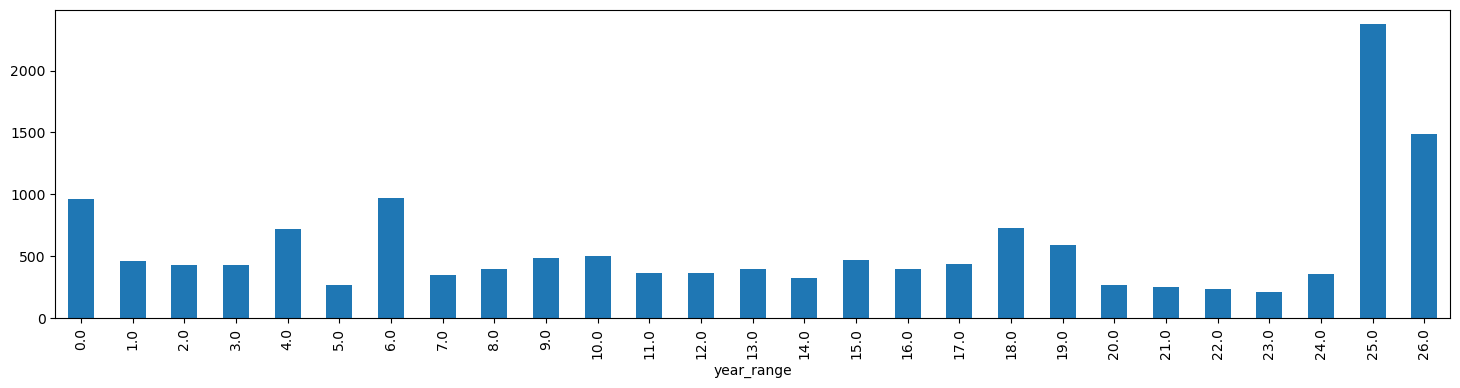

In [33]:
# Verify all rows have format information
assert not station_df[[f'format{i}' for i in range (1,9)]].notna().all(axis=1).any()

# Count number of unique letters
unique_count = len(station_df.letters.unique())
print(f'Count of Unique Stations: {unique_count}')

# Calculate age ranges
min_year = station_df.groupby(by = 'letters')['year'].agg('min').rename('min_year')
max_year = station_df.groupby(by = 'letters')['year'].agg('max').rename('max_year')
year_range_df = pd.merge(min_year, max_year, left_index=True, right_index=True, validate='1:1')
year_range_df['year_range'] = year_range_df.max_year - year_range_df.min_year

# Plot distribution
year_range_df.year_range.value_counts().sort_index().plot.bar(figsize=(18,4))

# Find cols I have complete info for
print()
print(f"Columns I have non-missing information for: {[col for col in station_df.columns if station_df[col].notna().all()]}")


In [34]:
station_df.to_csv("Exports/Data/2.StationDataAllYears.csv")